Original Data:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who           

<ipython-input-2-296981099>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


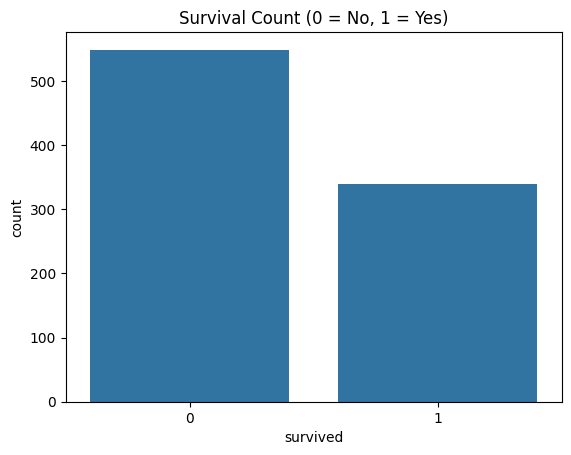

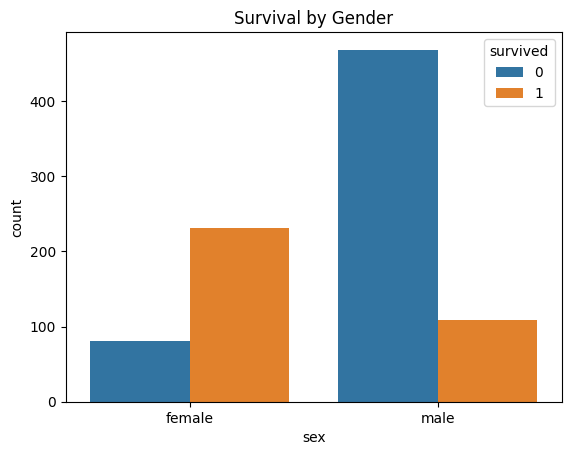

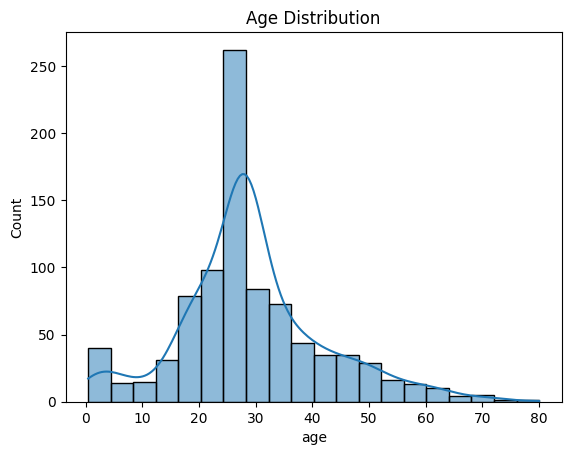

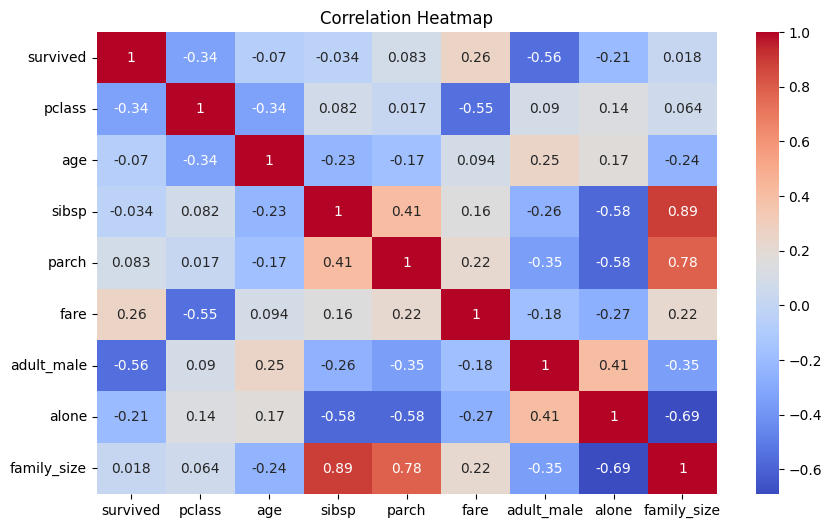

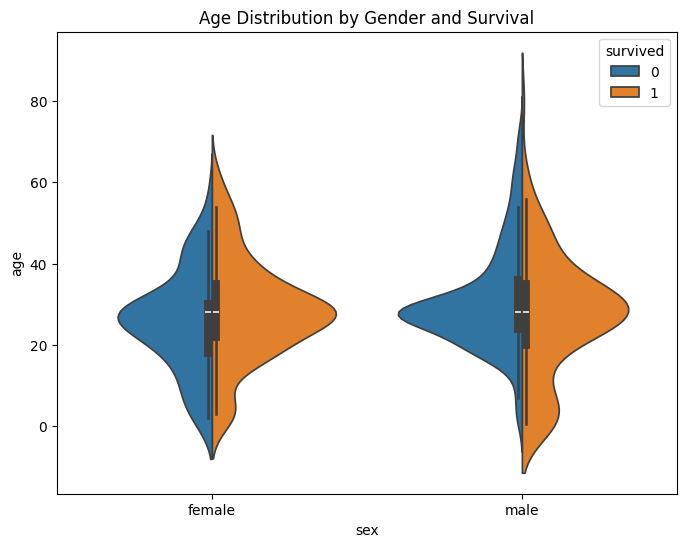

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

# 1. Preview the raw data
print("Original Data:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# 2. Data Cleaning

df.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)

# Fill missing 'age' values with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Convert 'sex' and 'embarked' to categorical (optional for analysis)
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

# -------- NEW: CLEAN TITLE COLUMN --------

# Capitalize names properly (if 'who' column or others used later)
df['who'] = df['who'].apply(lambda x: x.capitalize())

# -------- NEW: FEATURE ENGINEERING --------

# Create a new column for total family size onboard
df['family_size'] = df['sibsp'] + df['parch'] + 1

# 3. Summary after cleaning
print("\nCleaned Data:\n", df.info())

# 4. Data Visualization

sns.countplot(data=df, x='survived')
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Gender")
plt.show()

# c. Age distribution
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# d. Heatmap of correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -------- NEW: VIOLIN PLOT FOR AGE & SURVIVAL --------

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', split=True)
plt.title("Age Distribution by Gender and Survival")
plt.show()
